# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression? 


## Define Project

**Project Link:** [GitHub Project Repository](https://github.com/sirjanaY/DATA4380--Project-1)

**Challenge Description:**

The goal of this project is to develop a machine learning model that can predict whether a restaurant will pass or fail a health inspection based on inspection attributes and violation records. This can help prioritize inspections, reduce food safety risks, and support regulatory compliance across restaurants in New York City.

**Data Description:**

The dataset contains health inspection data for restaurants, including inspection outcomes, violation details, inspection types, and business-related attributes such as location, grade, and inspection score. The features include both numerical (e.g., inspection score) and categorical (e.g., grade, violation type, inspection type) variables.

**Type of Machine Learning:**

This is a **supervised machine learning** problem, specifically a **binary classification** task. The target variable is the **inspection result**, which is encoded as:
- `1` = Pass (`Satisfactory`, `Complete`)
- `0` = Fail (`Unsatisfactory`, `Incomplete`)


## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('inspection_dataset.csv')
df.head() #displaying 5 rows

/tmp/ipykernel_498/403842423.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('inspection_dataset.csv')


,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,03/24/2025,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,5.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DA05TOC3V,IVPIBRNZY,2.0
1,#807 TUTTA BELLA,#807 TUTTA BELLA,11/18/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,0.0,Complete,False,NaN,NaN,0,PR0089260,DAMSSXL7H,NaN,2.0
2,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, sa...",5,PR0089260,DAPY60A5G,IVNSPJXVQ,2.0
3,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,RED,"0100 - PIC present, demonstrates knowledge and...",5,PR0089260,DAPY60A5G,IVY8UFUQW,2.0
4,#807 TUTTA BELLA,#807 TUTTA BELLA,08/02/2024,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,15.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAPY60A5G,IVIIHZLLF,2.0


In [3]:
df.shape

(276510, 22)

In [4]:
df.duplicated().sum()


0

In [5]:
# checking for missing values
df_missing = df.isnull().sum()
df_missing

Name                               0
Program Identifier                 0
Inspection Date                  463
Description                        0
Address                            0
City                               0
Zip Code                           0
Phone                          71840
Longitude                        220
Latitude                         220
Inspection Business Name         463
Inspection Type                  463
Inspection Score                 498
Inspection Result                463
Inspection Closed Business       463
Violation Type                121880
Violation Description         121880
Violation Points                   0
Business_ID                        0
Inspection_Serial_Num            463
Violation_Record_ID           121880
Grade                          44658
dtype: int64

In [6]:
#Has a lot of missing values, will delete them since i have a lot of data

In [7]:

df = df.dropna(axis = 0, how='any')
df_new_missing = df.isnull().sum()
df_new_missing

Name                          0
Program Identifier            0
Inspection Date               0
Description                   0
Address                       0
City                          0
Zip Code                      0
Phone                         0
Longitude                     0
Latitude                      0
Inspection Business Name      0
Inspection Type               0
Inspection Score              0
Inspection Result             0
Inspection Closed Business    0
Violation Type                0
Violation Description         0
Violation Points              0
Business_ID                   0
Inspection_Serial_Num         0
Violation_Record_ID           0
Grade                         0
dtype: int64

In [8]:
df.shape

(111104, 22)

In [9]:
summary = []

for col in df.columns:
    if col == 'target':
        continue

    col_data = df[col].dropna()

    if df[col].dtype == 'object':
        ftype = 'Categorical'
        preview = ", ".join(map(str, col_data.unique()[:5]))  # Preview of the first 5 unique values
        if col_data.nunique() > 5:
            preview += "..."
    elif df[col].dtype == 'bool':
        ftype = 'Binary'
        preview = "0, 1"
    else:
        ftype = 'Numerical'
        preview = f"{col_data.min()} to {col_data.max()}"

    summary.append({'Feature': col,'Type': ftype,'Values / Range': preview})

summary_df = pd.DataFrame(summary)
display(summary_df)


,Feature,Type,Values / Range
0,Name,Categorical,"#807 TUTTA BELLA, +MAS CAFE, 100 LB CLAM, 1000..."
1,Program Identifier,Categorical,"#807 TUTTA BELLA, +MAS CAFE, 100 LB CLAM, 1000..."
2,Inspection Date,Categorical,"03/24/2025, 08/02/2024, 02/29/2024, 03/02/2023..."
3,Description,Categorical,"Seating 0-12 - Risk Category III, Seating 51-1..."
4,Address,Categorical,"2746 NE 45TH ST, 1906 N 34TH ST , 1001 FAIRVIE..."
5,City,Categorical,"SEATTLE, KENT, KENMORE, Seattle, ISSAQUAH..."
6,Zip Code,Categorical,"98105, 98103, 98109, 98101, 98032..."
7,Phone,Categorical,"(206) 722-6400, (206) 491-4694, (206) 369-2978..."
8,Longitude,Numerical,-122.4890343 to -121.0909
9,Latitude,Numerical,47.131776 to 47.98482449


In [10]:
outlier_counts = {}

# Looping through numeric columns
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Finding outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")

Violation Points: 10415 outliers
Inspection Score: 5440 outliers
Longitude: 2548 outliers
Latitude: 1851 outliers
Grade: 305 outliers


In [11]:
# Capping all numeric columns using the IQR method
for col in df.select_dtypes(include='number').columns:
    if col == 'target':
        continue  # Skip the target column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Capped values
    df[col] = df[col].clip(lower=lower, upper=upper)

In [12]:
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    print(f"{col}: {len(outliers)} remaining outliers")


Longitude: 0 remaining outliers
Latitude: 0 remaining outliers
Inspection Score: 0 remaining outliers
Violation Points: 0 remaining outliers
Grade: 0 remaining outliers


In [13]:
##Class imbalance
if 'Inspection Result' in df.columns:
    class_counts_result = df['Inspection Result'].value_counts(dropna=False)
    class_percentages_result = df['Inspection Result'].value_counts(normalize=True, dropna=False) * 100

    imbalance_result_df = pd.DataFrame({
        'Class': class_counts_result.index,
        'Count': class_counts_result.values,
        'Percentage': class_percentages_result.values.round(2)
    })
else:
    imbalance_result_df = pd.DataFrame({'Error': ['Inspection Result column not found']})

imbalance_result_df

,Class,Count,Percentage
0,Unsatisfactory,89080,80.18
1,Satisfactory,21364,19.23
2,Complete,579,0.52
3,Incomplete,28,0.03
4,Baseline Data,23,0.02
5,Not Ready For Inspection,13,0.01
6,Not Confirmed,9,0.01
7,Not Applicable,4,0.00
8,No Longer At Location,3,0.00
9,Confirmed,1,0.00


## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

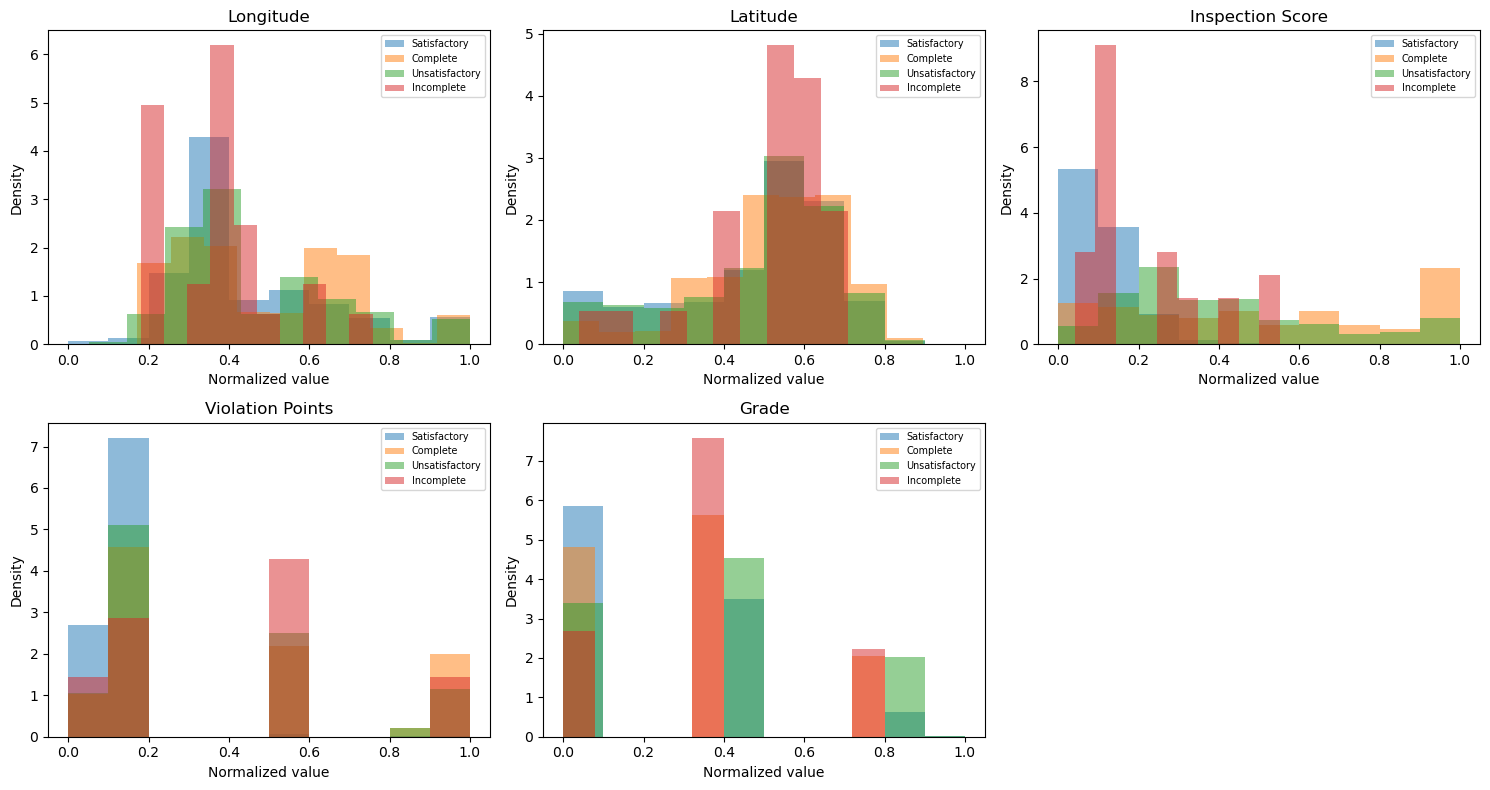

In [14]:
import math
from sklearn.preprocessing import MinMaxScaler

# Defining relevant classes for binary classification visualization
pass_classes = ['Satisfactory', 'Complete']
fail_classes = ['Unsatisfactory', 'Incomplete']
selected_classes = pass_classes + fail_classes

# Filtering the dataset to include only selected classes
df_filtered = df[df['Inspection Result'].isin(selected_classes)].dropna(subset=['Inspection Result'])

# Normalizing numerical features
features = [c for c in df_filtered.select_dtypes(include='number').columns]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_filtered[features])
scaled_df = pd.DataFrame(scaled, columns=features)
scaled_df['Inspection Result'] = df_filtered['Inspection Result'].values

n = len(features)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes_flat = axes.flatten()

for ax, feature in zip(axes_flat, features):
    for val in selected_classes:
        subset = scaled_df[scaled_df['Inspection Result'] == val][feature].dropna()
        ax.hist(subset, bins=10, density=True, alpha=0.5, label=val)
    ax.set_title(feature)
    ax.set_xlabel('Normalized value')
    ax.set_ylabel('Density')
    ax.legend(fontsize='x-small')

for unused_ax in axes_flat[len(features):]:
    unused_ax.axis('off')

plt.tight_layout()
plt.show()


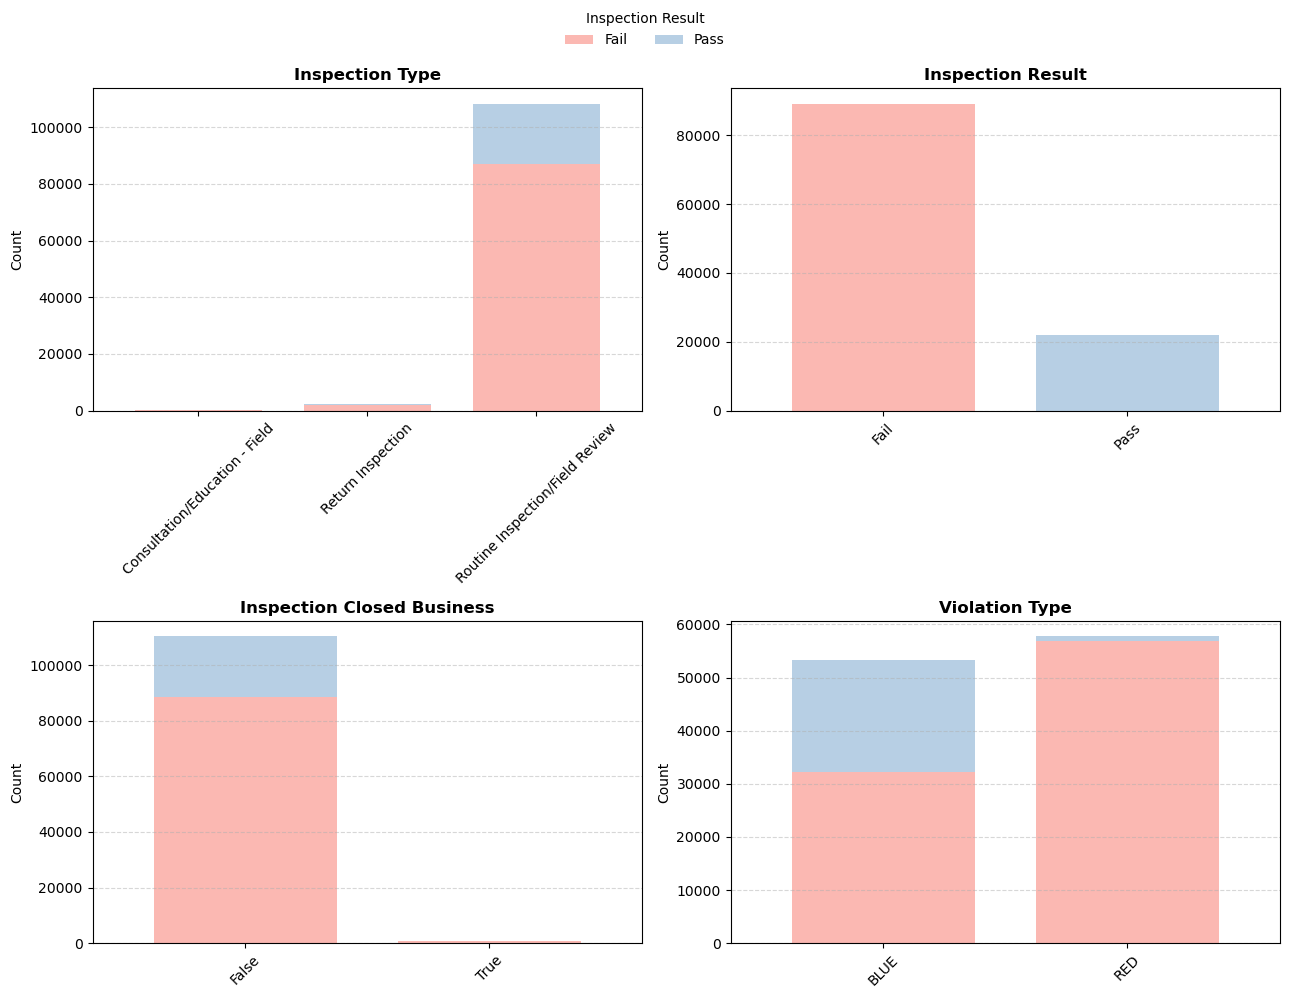

In [15]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

pastel_colors = get_cmap('Pastel1').colors

# Converting 'Inspection Result' to simplified binary labels
df_filtered['Inspection Result'] = df_filtered['Inspection Result'].replace({
    'Satisfactory': 'Pass',
    'Complete': 'Pass',
    'Unsatisfactory': 'Fail',
    'Incomplete': 'Fail'
})

#  only plotting low-cardinality categoricals
low_card_categoricals = [
    col for col in df_filtered.select_dtypes(include='object').columns
    if df_filtered[col].nunique() <= 10 and col not in ['Business_ID', 'Name', 'Address', 'Phone']
]

# Plot setup
n = len(low_card_categoricals)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes_flat = axes.flatten()

# Plot each feature
for ax, feature in zip(axes_flat, low_card_categoricals):
    counts = df_filtered.groupby(['Inspection Result', feature]).size().unstack(fill_value=0)
    counts.T.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.75,
        alpha=0.95,
        legend=False,
        color=[pastel_colors[0], pastel_colors[1]]  # Just two colors: Fail, Pass
    )
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles[:2], ['Fail', 'Pass'],
    title='Inspection Result', loc='upper center',
    ncol=2, frameon=False, fontsize='medium'
)

for unused_ax in axes_flat[len(low_card_categoricals):]:
    unused_ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [16]:
##no rescaling required

In [17]:


# Filtering the target classes
valid_classes = ['Satisfactory', 'Complete', 'Unsatisfactory', 'Incomplete']
df = df[df['Inspection Result'].isin(valid_classes)].copy()

# Encode target (1 = Pass, 0 = Fail)
df['result'] = df['Inspection Result'].apply(lambda x: 1 if x in ['Satisfactory', 'Complete'] else 0)

# Dropping unnecessary columns
drop_cols = [
    'Inspection Result', 'Business_ID', 'Inspection_Serial_Num', 'Violation_Record_ID',
    'Phone', 'Address', 'Inspection Business Name', 'Latitude', 'Longitude',
    'Program Identifier', 'Zip Code'
]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Replacing Inspection Date with Year and Month
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], errors='coerce')
df['Inspection Year'] = df['Inspection Date'].dt.year
df['Inspection Month'] = df['Inspection Date'].dt.month
df.drop(columns='Inspection Date', inplace=True)

# Grouping Violation Description into Top 10
top_violations = df['Violation Description'].value_counts().nlargest(10).index
df['Violation Description'] = df['Violation Description'].apply(
    lambda x: x if x in top_violations else 'Other'
)


# One-hot encoding selected categorical columns
onehot_cols = [ 'Inspection Type', 'Inspection Closed Business', 'Violation Type',]
df = pd.get_dummies(df, columns=onehot_cols)


# Converting boolean columns to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print(" Final shape after one-hot encoding:", df.shape)
df.head(3)


 Final shape after one-hot encoding: (111051, 17)


,Name,Description,City,Inspection Score,Violation Description,Violation Points,Grade,result,Inspection Year,Inspection Month,Inspection Type_Consultation/Education - Field,Inspection Type_Return Inspection,Inspection Type_Routine Inspection/Field Review,Inspection Closed Business_False,Inspection Closed Business_True,Violation Type_BLUE,Violation Type_RED
0,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,5.0,2120 - Proper cold holding temperatures ( 42 d...,5.0,2.0,0,2025,3,0,0,1,1,0,0,1
2,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,15.0,"3400 - Wiping cloths properly used, stored, sa...",5.0,2.0,0,2024,8,0,0,1,1,0,1,0
3,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,15.0,Other,5.0,2.0,0,2024,8,0,0,1,1,0,0,1


In [18]:
df.to_csv('cleaned_inspection_data.csv', index=False)
